# importo le librerie e il dataset

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from scipy.stats import norm

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
#from mlxtend.regressor import StackingCVRegressor

In [2]:
house=pd.read_csv('https://raw.githubusercontent.com/5526-michelegit/machine-learning/main/kc_house_data.csv')
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# utilizzo 2 funzioni utili per l'analisi e la pulizia del dataset

In [4]:
def df_characteristics(df):
    
    print('The shape of this dataframe is: {}'.format(df.shape), '\n')
    
    df_num = df.select_dtypes(include=[np.number])
    print('This dataframe has {} numeric features.'.format(df_num.shape[1]), '\n')
    print(df_num.columns, '\n')
    
    df_cat = df.select_dtypes(exclude=[np.number])
    print('This dataframe has {} categorical features.'.format(df_cat.shape[1]), '\n')
    print(df_cat.columns)

In [5]:
df_characteristics(house)

The shape of this dataframe is: (21613, 21) 

This dataframe has 20 numeric features. 

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object') 

This dataframe has 1 categorical features. 

Index(['date'], dtype='object')


In [6]:
def remove_collinear_features(x, threshold):
    
    # Create correlation matrix:
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []
    
    # Work through the iterations setup:
    for i in iters:
        for j in range(i+1):
            items = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = items.columns
            row = items.index
            val = abs(items.values)
            
            # Compare against threshold:
            if val >= threshold:
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])
                
    cols_to_drop = set(drop_cols)
    x = x.drop(columns = cols_to_drop, axis=1)
    
    return x

In [7]:
#tramite questa funzione possiamo vedere che la maggior parte degli attributi sono numerici anche se l'anno di costruzione e l'anno di ristrutturazione sono definiti tramite variabili numeriche invece che anno.
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Pulizia dataset

In [8]:
#creo un dataset uguale ad house cosi da lavorare sempre sulla copia del dataset
house_copy = house.copy()
house_copy

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [9]:
#creo una colonna che mi dirà da quanti anni è stata ristrutturata la casa (perchè ovviamente più recentemente è stata ristrutturata e più alto sarà il suo valore)
house_copy['Yrs_since_renovated'] = np.where(house_copy['yr_renovated'] == 0, (2022 - house_copy['yr_built']), (2022 - house_copy['yr_renovated']))

In [10]:
house_copy.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Yrs_since_renovated
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,67
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,31
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,89
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,57
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,35


In [11]:
# controllo se ci sono valori nulli
house_copy.isnull().sum()

id                     0
date                   0
price                  0
bedrooms               0
bathrooms              0
sqft_living            0
sqft_lot               0
floors                 0
waterfront             0
view                   0
condition              0
grade                  0
sqft_above             0
sqft_basement          0
yr_built               0
yr_renovated           0
zipcode                0
lat                    0
long                   0
sqft_living15          0
sqft_lot15             0
Yrs_since_renovated    0
dtype: int64

In [12]:
house_copy.dropna(inplace=True)

In [13]:
#sistemo il problema della data
house_copy['date'] = house_copy['date'].apply(lambda x: dt.datetime.strptime(x, '%Y%m%dT%H%M%S'))
house_copy['Month'] = house_copy['date'].apply(lambda date: date.month)
house_copy['Year'] = house_copy['date'].apply(lambda date: date.year)

In [14]:
house_copy.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Yrs_since_renovated,Month,Year
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,67,10,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,31,12,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,89,2,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,57,12,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,35,2,2015


In [15]:
#trasformo i float di bathrooms e floors in integers
house_copy['bathrooms'] = np.round(house_copy['bathrooms'])
house_copy['floors'] = np.round(house_copy['floors'])


In [16]:
house_copy.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Yrs_since_renovated,Month,Year
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,67,10,2014
1,6414100192,2014-12-09,538000.0,3,2.0,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,31,12,2014
2,5631500400,2015-02-25,180000.0,2,1.0,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,89,2,2015
3,2487200875,2014-12-09,604000.0,4,3.0,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,57,12,2014
4,1954400510,2015-02-18,510000.0,3,2.0,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,35,2,2015


<AxesSubplot:xlabel='Year', ylabel='price'>

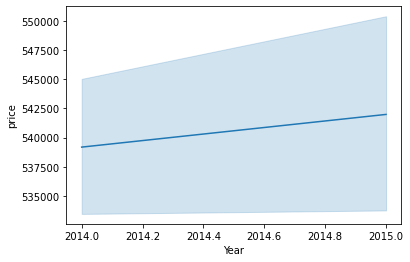

In [17]:
#controllo l'andamento del prezzo negli anni e sembra che anche se non in modo esponenziale tenda a salire
sns.lineplot(x='Year',y='price',data=house_copy)

<AxesSubplot:xlabel='view', ylabel='count'>

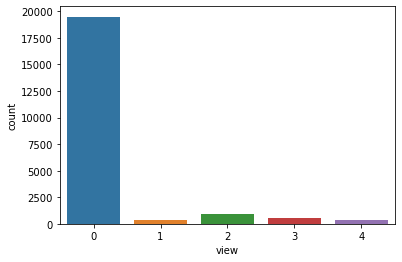

In [18]:
#si può notare che ci sono molte più case senza una view che negli altri casi
sns.countplot(x='view',data=house_copy)


<AxesSubplot:xlabel='waterfront', ylabel='count'>

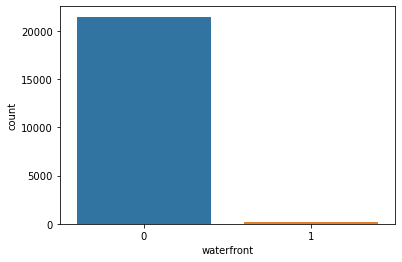

In [19]:
#molte poche waterfront houses
sns.countplot(x='waterfront',data=house_copy)

In [20]:
#controllo adesso la relazione che c'è tra il numero di stanze con la view rispetto al prezzo delle proprietà (inutile)

print('Mean of 1 room with view: ',house_copy.loc[(house_copy['waterfront']==1)&(house_copy['bedrooms']==1)]['price'].mean())

print('Mean of 1 room without view: ',house_copy.loc[(house_copy['waterfront']==0)&(house_copy['bedrooms']==1)]['price'].mean())

print('Mean of 2 rooms with view: ',house_copy.loc[(house_copy['waterfront']==1)&(house_copy['bedrooms']==2)]['price'].mean())

print('Mean of 2 rooms without view: ',house_copy.loc[(house_copy['waterfront']==0)&(house_copy['bedrooms']==2)]['price'].mean())

print('Mean of 3 rooms with view: ',house_copy.loc[(house_copy['waterfront']==1)&(house_copy['bedrooms']==3)]['price'].mean())

print('Mean of 3 rooms without view: ',house_copy.loc[(house_copy['waterfront']==0)&(house_copy['bedrooms']==3)]['price'].mean())

print('Mean of 4 rooms with view: ',house_copy.loc[(house_copy['waterfront']==1)&(house_copy['bedrooms']==4)]['price'].mean())

print('Mean of 4 rooms without view: ',house_copy.loc[(house_copy['waterfront']==0)&(house_copy['bedrooms']==4)]['price'].mean())


Mean of 1 room with view:  622680.0
Mean of 1 room without view:  309781.1030927835
Mean of 2 rooms with view:  918567.4838709678
Mean of 2 rooms without view:  395497.62183950166
Mean of 3 rooms with view:  1526424.21875
Mean of 3 rooms without view:  459279.99887295085
Mean of 4 rooms with view:  1928485.0
Mean of 4 rooms without view:  627859.9280912013


<AxesSubplot:xlabel='grade', ylabel='price'>

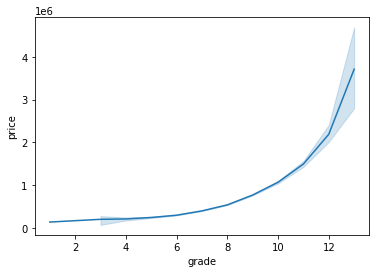

In [21]:
#più alto è il grade e più alto è il prezzo ovviamente. Si nota inoltre che i prezzi non variano molto fra 2 e 6 a causa forse di una forte similarità delle case

sns.lineplot(x='grade',y='price',data=house_copy,palette='terrain')


<AxesSubplot:xlabel='bathrooms', ylabel='price'>

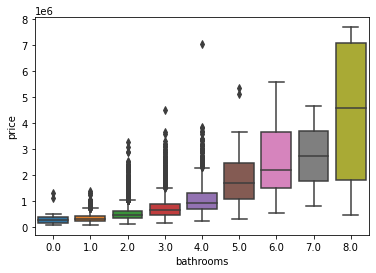

In [22]:
#controllo ora la relazione fra in numero di bagni e il prezzo

sns.boxplot(x='bathrooms',y='price',data=house_copy)


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

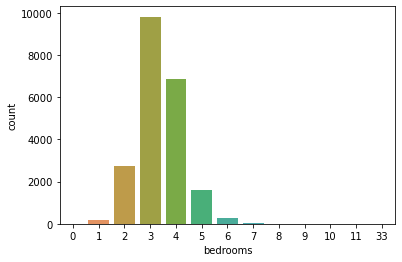

In [23]:
#si nota che sono presenti molte più case con 3 o 4 camere da letto rispetto alle altre, il che ci fa capire che ci sono molti altri attributi che valorizzano la casa e non solo le view, i waterfront o i bathrooms
sns.countplot(x='bedrooms',data=house_copy)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


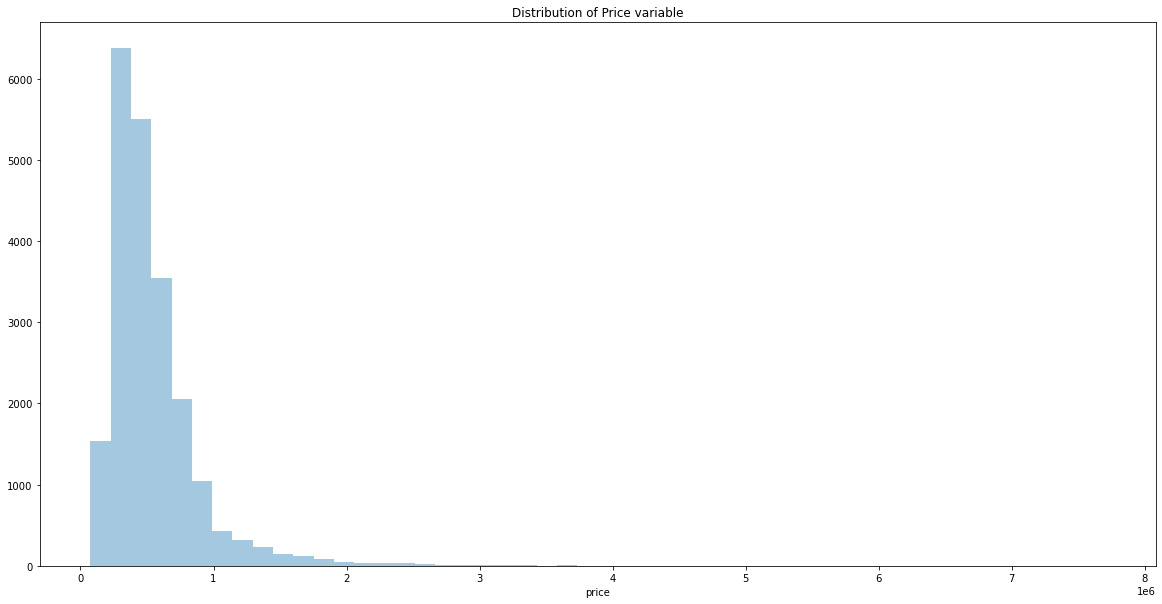

In [24]:
#ora provo a plottare la variabile dipendente price per vedere il suo comportamento
#si nota che è presente un'asimmetria positiva 

plt.figure(figsize=(20,10))
sns.distplot(house_copy.price, kde=False).set_title('Distribution of Price variable')
plt.show()


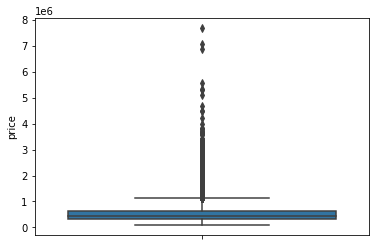

In [25]:
#controllo gli outliers
#la presenza di outlier è molto forte nella coda positiva
plt.figure(figsize=(6,4))
sns.boxplot(y=house_copy['price']).set_title
plt.show()


In [26]:
#creo una funzione che calcola il range interquantile
def calc_interquartile(house_copy, column):
    global lower, upper
    #calcolo il primo e il terzo quartile
    first_quartile, third_quartile = np.percentile(house_copy[column], 25), np.percentile(house_copy[column], 75)
    #calcolo il range interquantile
    iqr = third_quartile - first_quartile
    #outlier cutoff e uso il valore generico del calcolo degli outlier 1.5
    cutoff = iqr*1.5
    #calcolo il limite inferiore e superiore
    lower, upper = first_quartile - cutoff , third_quartile + cutoff
    #rimuovo gli outlier dalle colonne
    upper_outliers = house_copy[house_copy[column] > upper]
    lower_outliers = house_copy[house_copy[column] < lower]
    print('Lower outliers', lower_outliers.shape[0])
    print('Upper outliers', upper_outliers.shape[0])
    return print('total outliers', upper_outliers.shape[0] + lower_outliers.shape[0])



In [27]:
#applico la funzione precedente a tutte le colonne per trovare gli outlier in ogni feature
for i in house_copy.columns:
    print('Total outliers in ', i)
    calc_interquartile(house_copy, i)
    print()

Total outliers in  id
Lower outliers 0
Upper outliers 0
total outliers 0

Total outliers in  date
Lower outliers 0
Upper outliers 0
total outliers 0

Total outliers in  price
Lower outliers 0
Upper outliers 1146
total outliers 1146

Total outliers in  bedrooms
Lower outliers 212
Upper outliers 334
total outliers 546

Total outliers in  bathrooms
Lower outliers 3947
Upper outliers 3815
total outliers 7762

Total outliers in  sqft_living
Lower outliers 0
Upper outliers 572
total outliers 572

Total outliers in  sqft_lot
Lower outliers 0
Upper outliers 2425
total outliers 2425

Total outliers in  floors
Lower outliers 0
Upper outliers 8
total outliers 8

Total outliers in  waterfront
Lower outliers 0
Upper outliers 163
total outliers 163

Total outliers in  view
Lower outliers 0
Upper outliers 2124
total outliers 2124

Total outliers in  condition
Lower outliers 30
Upper outliers 0
total outliers 30

Total outliers in  grade
Lower outliers 275
Upper outliers 1636
total outliers 1911

Tota

In [28]:
#creo una funzione per il calcolo degli zscore che sottrae la media da ogni punto e la divide per la deviazione standard e se il valore zscore di qualsiasi punto è minore di -3 o maggiore di 3, allora quel punto dati è un valore anomalo

def z_score(house_copy, column):
    #creo delle variabili globali per plottare il grafico 
    global zscore, outlier
     
    zscore = []
    outlier =[]
    
    threshold = 3
    
    mean = np.mean(house_copy[column])
    
    std = np.std(house_copy[column])
    for i in house_copy[column]:
        z = (i-mean)/std
        zscore.append(z)
        
        if np.abs(z) > threshold:
            outlier.append(i)
    return print('total outliers', len(outlier))



total outliers 406
2016.5 2012.5


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


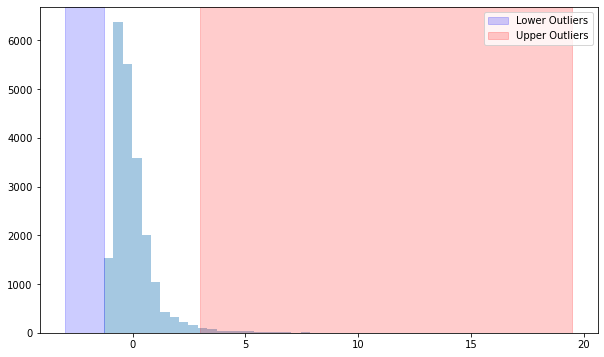

In [29]:
#plotto gli outlier per la variabile feature 
z_score(house_copy, 'price')
plt.figure(figsize = (10,6))
sns.distplot(zscore, kde=False)
print(upper, lower)
plt.axvspan(xmin = -3 ,xmax= min(zscore),alpha=0.2, color='blue', label='Lower Outliers')
plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red', label='Upper Outliers')
plt.legend()
plt.show()


In [30]:
#applico ora la rimozione degli outlier tramite la zscore

dj=[]
for i in house_copy.price:
    if i in set(outlier):
        dj.append(0.0)
    else:
        dj.append(i)
        
house_copy['P'] = dj

house2= house_copy.drop(house_copy[house_copy['P'] == 0.0].index) 
house2.shape


(21207, 25)

In [31]:
#saranno presenti sicuramente altri outlier ma non li rimuovo perchè potrei perdere informazioni in quel caso
house2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Yrs_since_renovated,Month,Year,P
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,67,10,2014,221900.0
1,6414100192,2014-12-09,538000.0,3,2.0,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,31,12,2014,538000.0
2,5631500400,2015-02-25,180000.0,2,1.0,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,89,2,2015,180000.0
3,2487200875,2014-12-09,604000.0,4,3.0,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,57,12,2014,604000.0
4,1954400510,2015-02-18,510000.0,3,2.0,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,35,2,2015,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.0,1530,1131,3.0,0,0,...,0,98103,47.6993,-122.346,1530,1509,13,5,2014,360000.0
21609,6600060120,2015-02-23,400000.0,4,2.0,2310,5813,2.0,0,0,...,0,98146,47.5107,-122.362,1830,7200,8,2,2015,400000.0
21610,1523300141,2014-06-23,402101.0,2,1.0,1020,1350,2.0,0,0,...,0,98144,47.5944,-122.299,1020,2007,13,6,2014,402101.0
21611,291310100,2015-01-16,400000.0,3,2.0,1600,2388,2.0,0,0,...,0,98027,47.5345,-122.069,1410,1287,18,1,2015,400000.0


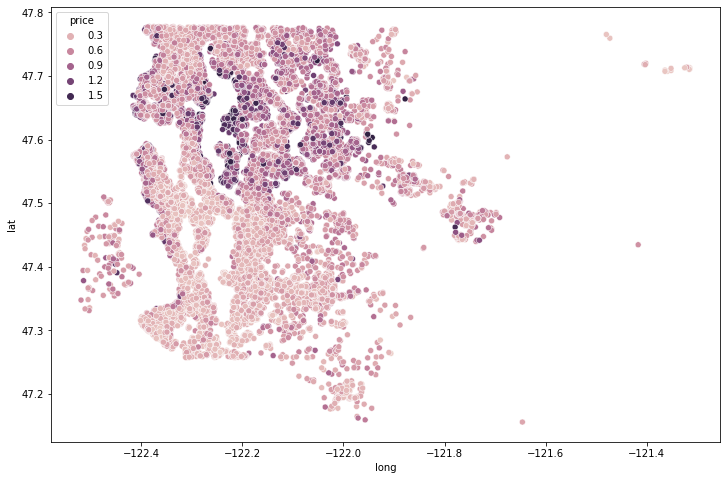

In [32]:
# grafico di long e lat per vedere quali sono i luoghi sulla mappa delle case più costose
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=house2,hue='price')
plt.show()


In [33]:
house2.sort_values('price', ascending = False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Yrs_since_renovated,Month,Year,P
14995,4054550010,2015-04-13,1640000.0,5,4.0,4780,118047,2.0,0,0,...,0,98077,47.7243,-122.052,4040,31760,28,4,2015,1640000.0
13633,3528900401,2014-07-01,1640000.0,3,3.0,3140,5445,2.0,0,3,...,0,98109,47.6406,-122.347,2950,5250,109,7,2014,1640000.0
15692,6117502230,2014-12-01,1637500.0,3,4.0,4660,21164,2.0,1,4,...,1990,98166,47.4418,-122.354,3140,24274,32,12,2014,1637500.0
15924,7533800170,2014-07-07,1636000.0,3,2.0,3110,6765,2.0,0,1,...,0,98115,47.6886,-122.276,2630,7626,76,7,2014,1636000.0
2112,7787400030,2014-06-09,1635000.0,5,4.0,4220,26784,1.0,0,0,...,2006,98004,47.6003,-122.206,3450,33945,16,6,2014,1635000.0
17324,9809000010,2015-01-06,1629000.0,5,2.0,3090,16583,2.0,0,0,...,0,98004,47.6458,-122.218,3740,17853,58,1,2015,1629000.0
8174,9279700150,2015-02-12,1625000.0,4,4.0,4410,8112,3.0,0,4,...,0,98116,47.5888,-122.392,2770,5750,19,2,2015,1625000.0
14233,5318101565,2014-07-03,1625000.0,4,3.0,2980,3600,2.0,0,0,...,0,98112,47.6352,-122.284,2980,4800,23,7,2014,1625000.0
5739,6613000585,2015-01-08,1620500.0,3,2.0,3490,9362,1.0,0,3,...,0,98105,47.6605,-122.270,3640,7425,62,1,2015,1620500.0
16268,3025300250,2015-05-13,1620000.0,4,2.0,2350,17709,2.0,0,0,...,0,98039,47.6232,-122.236,3360,19855,45,5,2015,1620000.0


In [34]:
#sistemo la variabile year renovated perchè alcune case non sono state ristrutturate da quando sono state costruite per cui sostituisco il valore zero con l'anno di costruzione
house2['yr_renovated'] = house2[['yr_renovated', 'yr_built']].apply(lambda pair: pair[0] if pair[0] != 0 else pair[1], axis=1)

In [35]:
house2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Yrs_since_renovated,Month,Year,P
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,...,1955,98178,47.5112,-122.257,1340,5650,67,10,2014,221900.0
1,6414100192,2014-12-09,538000.0,3,2.0,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,31,12,2014,538000.0
2,5631500400,2015-02-25,180000.0,2,1.0,770,10000,1.0,0,0,...,1933,98028,47.7379,-122.233,2720,8062,89,2,2015,180000.0
3,2487200875,2014-12-09,604000.0,4,3.0,1960,5000,1.0,0,0,...,1965,98136,47.5208,-122.393,1360,5000,57,12,2014,604000.0
4,1954400510,2015-02-18,510000.0,3,2.0,1680,8080,1.0,0,0,...,1987,98074,47.6168,-122.045,1800,7503,35,2,2015,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.0,1530,1131,3.0,0,0,...,2009,98103,47.6993,-122.346,1530,1509,13,5,2014,360000.0
21609,6600060120,2015-02-23,400000.0,4,2.0,2310,5813,2.0,0,0,...,2014,98146,47.5107,-122.362,1830,7200,8,2,2015,400000.0
21610,1523300141,2014-06-23,402101.0,2,1.0,1020,1350,2.0,0,0,...,2009,98144,47.5944,-122.299,1020,2007,13,6,2014,402101.0
21611,291310100,2015-01-16,400000.0,3,2.0,1600,2388,2.0,0,0,...,2004,98027,47.5345,-122.069,1410,1287,18,1,2015,400000.0


In [36]:
# controllo le correlazioni
corr_features =[]

for i , r in house2.corr().iterrows():
    k=0
    for j in range(len(r)):
        if i!= r.index[k]:
            if r.values[k] >=0.5:
                corr_features.append([i, r.index[k], r.values[k]])
        k += 1
corr_features


[['price', 'sqft_living', 0.6649420390633328],
 ['price', 'grade', 0.6720699089272333],
 ['price', 'sqft_above', 0.5671393725708292],
 ['price', 'sqft_living15', 0.595248615352564],
 ['price', 'P', 1.0],
 ['bedrooms', 'sqft_living', 0.581191786402295],
 ['bathrooms', 'sqft_living', 0.6717854387142764],
 ['bathrooms', 'grade', 0.5558490097444979],
 ['bathrooms', 'sqft_above', 0.5601070148013279],
 ['sqft_living', 'price', 0.6649420390633328],
 ['sqft_living', 'bedrooms', 0.581191786402295],
 ['sqft_living', 'bathrooms', 0.6717854387142764],
 ['sqft_living', 'grade', 0.7381718721198105],
 ['sqft_living', 'sqft_above', 0.8633520425950245],
 ['sqft_living', 'sqft_living15', 0.7518067151295618],
 ['sqft_living', 'P', 0.6649420390633327],
 ['sqft_lot', 'sqft_lot15', 0.7195383742116734],
 ['grade', 'price', 0.6720699089272333],
 ['grade', 'bathrooms', 0.5558490097444979],
 ['grade', 'sqft_living', 0.7381718721198105],
 ['grade', 'sqft_above', 0.7333566592385126],
 ['grade', 'sqft_living15', 0

<AxesSubplot:title={'center':'Correlation with house prices in King County'}>

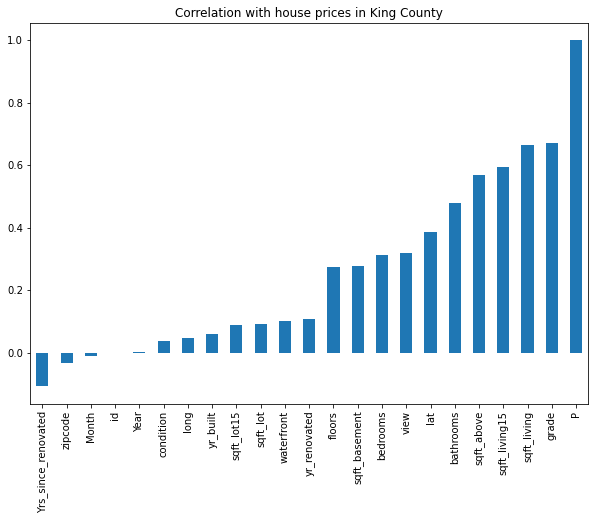

In [37]:
#correlazione del prezzo con le altre variabili
plt.figure(figsize=(10, 7))
house2.corr().sort_values('price').drop('price')['price'].plot(kind='bar', title='Correlation with house prices in King County')


Correlation value between Number of Bedrooms and Price:  0.3111565941960255


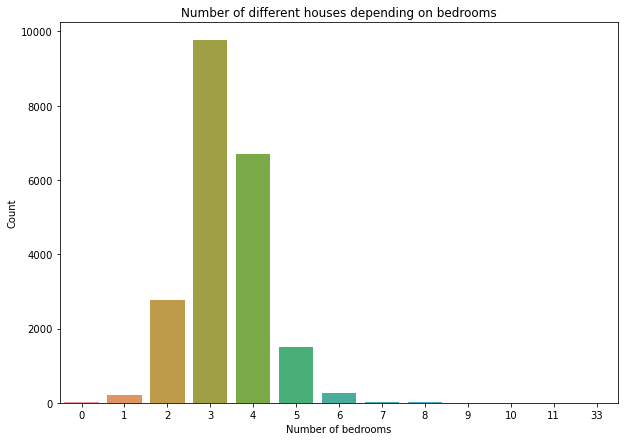

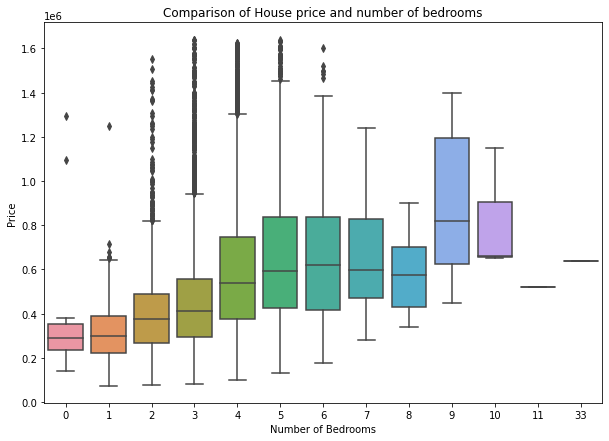

In [38]:
#analizzo number of bedrooms
plt.figure(figsize=(10, 7))
sns.countplot(x='bedrooms', data=house2).set(ylabel='Count', title='Number of different houses depending on bedrooms', xlabel='Number of bedrooms')

plt.figure(figsize=(10, 7))
sns.boxplot(x='bedrooms', y='price', data=house2).set(xlabel='Number of Bedrooms', ylabel='Price', title='Comparison of House price and number of bedrooms')
#il numero delle stanze non sembra avere una correlazione molto alta con il prezzo delle case. Molte case sono prezzate sotto il milione di dollari poichè i valori medi per tutti i boxplot scendono al di sotto di quel prezzo.
print('Correlation value between Number of Bedrooms and Price: ', house2.corr().loc['price', 'bedrooms'])


[Text(0.5, 0, 'Sqft Living Space'), Text(0, 0.5, 'Price of the house')]

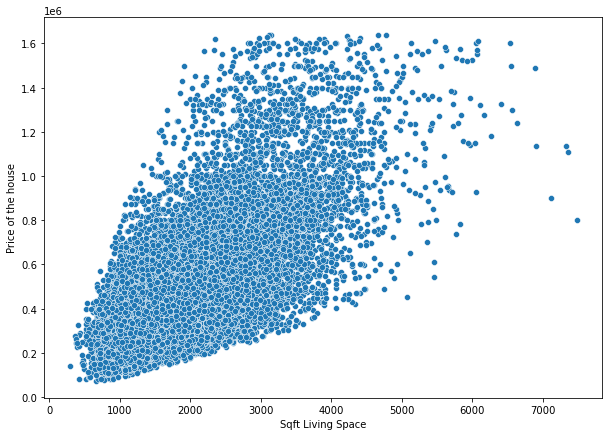

In [39]:
#analizzo ora Sqft Living 

plt.figure(figsize=(10, 7))
sns.scatterplot(x='sqft_living', y='price', data=house2).set(xlabel='Sqft Living Space', ylabel='Price of the house')

#Sembra che questa variabile abbia una correlazione molto alta con il prezzo. In ogni caso ci sono anche degli outlier molto pesanti qui. Questi outlier potrebbero avere un cattivo effetto sull'accuratezza del nostro modello.




[Text(0.5, 0, ''),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Number of waterfront and non waterfront houses'),
 [Text(0, 0, 'No waterfront'), Text(1, 0, 'Yes waterfront')]]

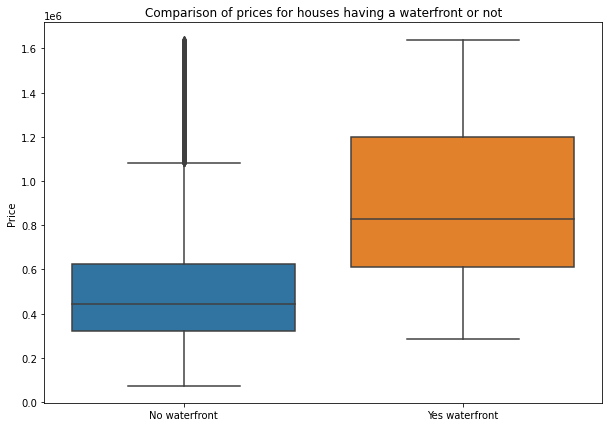

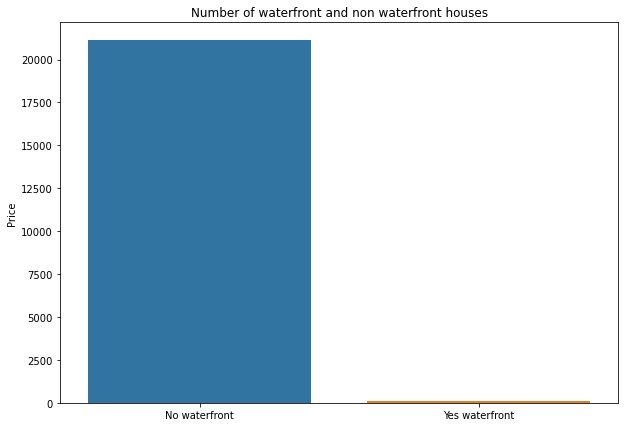

In [40]:
#analizzo Waterfront

plt.figure(figsize=(10, 7))
sns.boxplot(x='waterfront', y='price', data=house2).set(xlabel='', ylabel='Price', title='Comparison of prices for houses having a waterfront or not',
                                                        xticklabels=['No waterfront', 'Yes waterfront'])


plt.figure(figsize=(10, 7))
sns.countplot(x='waterfront', data=house2).set(xlabel='', ylabel='Price', title='Number of waterfront and non waterfront houses',
                                             xticklabels=['No waterfront', 'Yes waterfront'])


#le case con waterfront tendono ad avere prezzi più alti, ma il numero di case con waterfront nel campione comparato alle case senza waterfront è molto basso

[Text(0.5, 0, ''),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Number of Houses according to thier age'),
 [Text(0, 0, 'Less than 100 years old'), Text(1, 0, 'Over a 100 years Old')]]

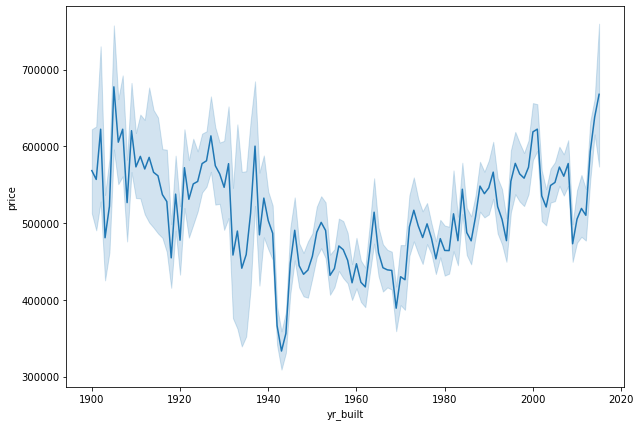

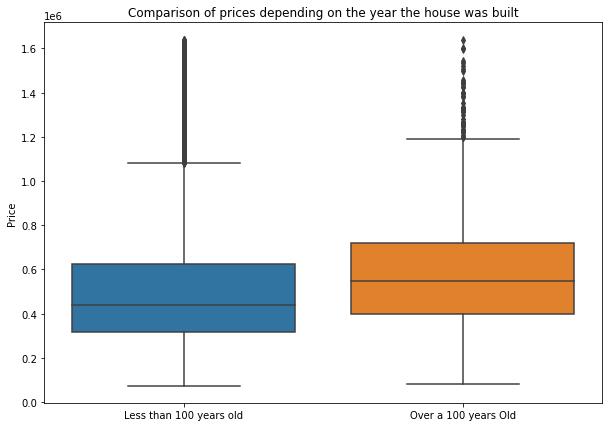

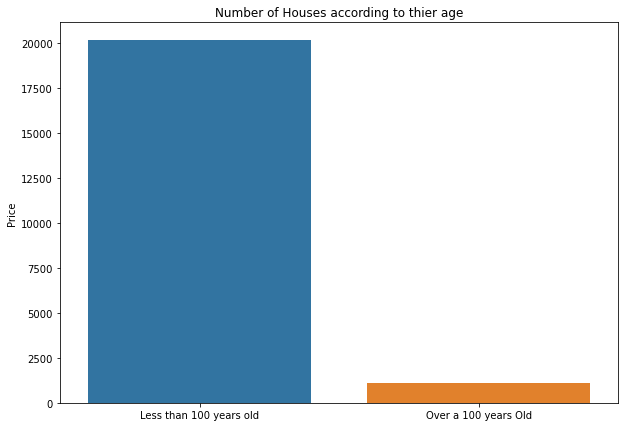

In [41]:
#analizzo year built e year renovated

#si nota che le case con oltre 100 anni tendono ad avere prezzi più alti

plt.figure(figsize=(10, 7))
sns.lineplot(x='yr_built', y='price', data=house2)
house2['century_old'] = house2['yr_built'].apply(lambda year: 1 if year <= 1915 else 0)


plt.figure(figsize=(10, 7))
sns.boxplot(x='century_old', y='price', data=house2).set(xlabel='', ylabel='Price', title='Comparison of prices depending on the year the house was built',
                                                        xticklabels=['Less than 100 years old', 'Over a 100 years Old'])


plt.figure(figsize=(10, 7))
sns.countplot(x='century_old', data=house2).set(xlabel='', ylabel='Price', title='Number of Houses according to thier age',
                                                xticklabels=['Less than 100 years old', 'Over a 100 years Old'])


In [42]:
#uso il dataset non aggiornato, ossia quello di partenza perchè avevo modificato quella variabile. Si nota comunque che moltissimi valori sono uguali a zero, quindi ci sono state pochissime ristrutturazioni
house_copy['yr_renovated'].value_counts()


0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

[Text(0.5, 0, 'Year of Renovation'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Relation between house price and year of renovation')]

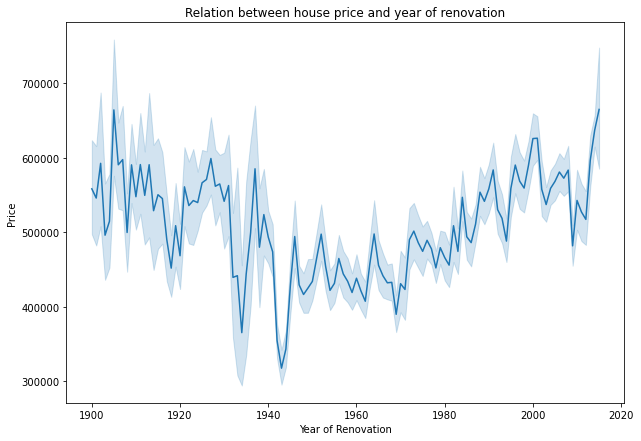

In [43]:
#vediamo come la ristrutturazione influenza i prezzi delle case

plt.figure(figsize=(10, 7))
sns.lineplot(x='yr_renovated', y='price', data=house2[house2['yr_renovated'] != 0]).set(xlabel='Year of Renovation', ylabel='Price',
                                                                                        title='Relation between house price and year of renovation')

#da questi valori sembra che le case ristrutturate tendono ad avere un prezzo maggiore

<AxesSubplot:xlabel='long', ylabel='lat'>

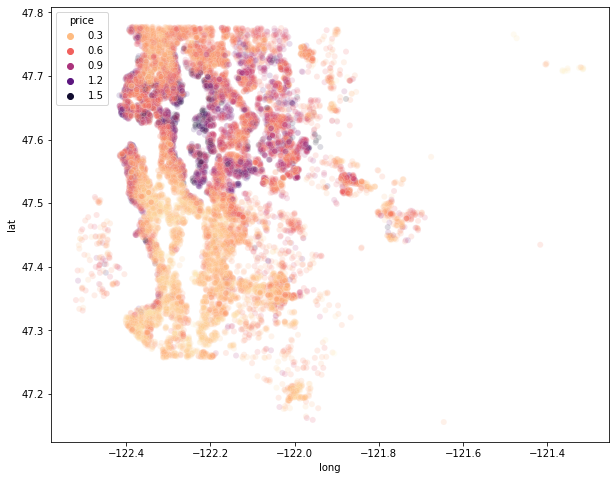

In [44]:
#analizzo latitudine e longitudine


plt.figure(figsize=(10, 8))
sns.scatterplot(x='long', y='lat', data=house2, hue='price', palette='magma_r', alpha=0.15)


In [45]:
#Sembra che i prezzi siano molto equamente distribuiti sul territorio. Ma c'è un problema, se guardiamo la legenda il prezzo è di 3 milioni di dollari. Abbiamo visto prima che la maggior parte delle case ha un prezzo inferiore a 1 milione. Quindi vediamo quale percentuale di case si trova nel limite di prezzo inferiore a 3, 2,5, 2 e 1,5 milioni

print('Percentage of houses priced below 3 million USD: ', len(house2[house2['price'] < 3000000]) / len(house2) * 100)
print('Percentage of houses priced below 2.5 million USD: ', len(house2[house2['price'] < 2500000]) / len(house2) * 100)
print('Percentage of houses priced below 2 million USD: ', len(house2[house2['price'] < 2000000]) / len(house2) * 100)
print('Percentage of houses priced below 1.5 million USD: ', len(house2[house2['price'] < 1500000]) / len(house2) * 100)


Percentage of houses priced below 3 million USD:  100.0
Percentage of houses priced below 2.5 million USD:  100.0
Percentage of houses priced below 2 million USD:  100.0
Percentage of houses priced below 1.5 million USD:  99.40114113264488


<AxesSubplot:xlabel='long', ylabel='lat'>

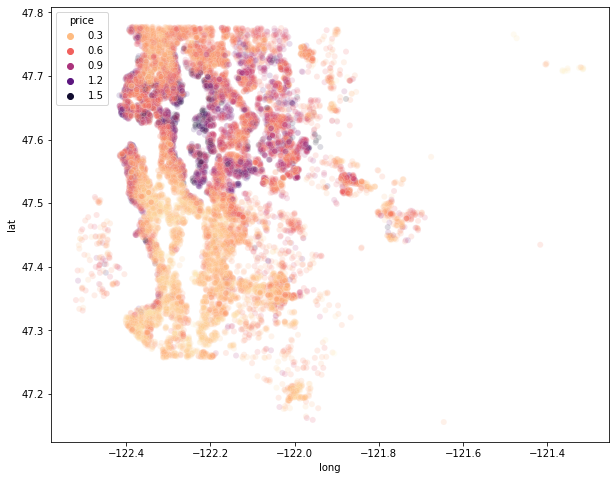

In [46]:
#da questi valori sembra che se mettiamo un limite al prezzo a 2 milioni perderemmo solo l'1% dei dati. Vediamo come l'aggiunta di questo limite influisce sulla nostra analisi di latitudine e longitudine

plt.figure(figsize=(10, 8))
sns.scatterplot(x='long', y='lat', data=house2[house2['price'] < 2000000], hue='price', palette='magma_r', alpha=0.15)


In [47]:
#Poiché possiamo ottenere le informazioni relative all'area dalla combinazione di latitudine e longitudine, credo che lo zipcode possa essere eliminato senza che crei problemi

min:  2014-05-02 00:00:00 
max:  2015-05-27 00:00:00


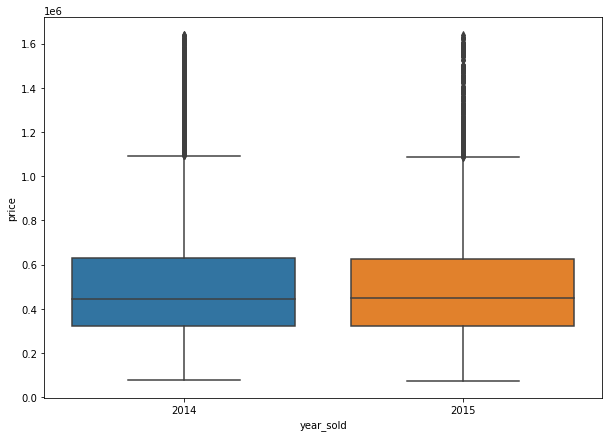

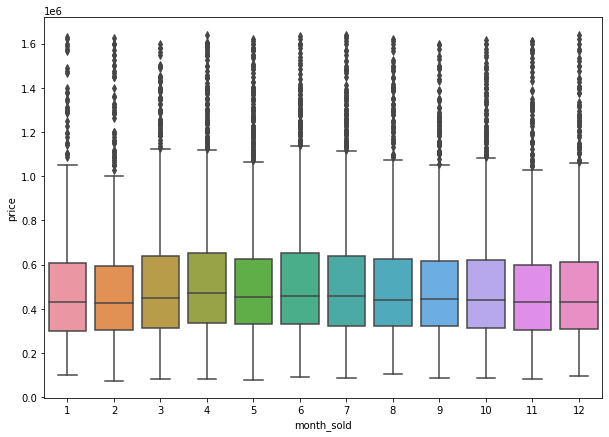

In [48]:
#analizzo date

house2['year_sold'] = house2['date'].apply(lambda date: date.year)
house2['month_sold'] = house2['date'].apply(lambda date: date.month)


plt.figure(figsize=(10, 7))
sns.boxplot(x='year_sold', y='price', data=house2)


plt.figure(figsize=(10, 7))
sns.boxplot(x='month_sold', y='price', data=house2)


print('min: ', house2['date'].min(), '\nmax: ',house2['date'].max())


#Sia l'anno che il mese di vendita non sembrano avere alcun effetto sul prezzo della casa. Ha senso secondo poiché i dati si estendono per soli 13 mesi, il che non è una finestra abbastanza grande per le fluttuazioni dei prezzi delle case.




In [49]:
#Poiché la data e le sue caratteristiche estratte non hanno molto effetto sul prezzo della casa si possono rimuovere

house2.drop(['date', 'year_sold', 'month_sold'], axis=1, inplace=True)
house2

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,Yrs_since_renovated,Month,Year,P,century_old
0,7129300520,221900.0,3,1.0,1180,5650,1.0,0,0,3,...,98178,47.5112,-122.257,1340,5650,67,10,2014,221900.0,0
1,6414100192,538000.0,3,2.0,2570,7242,2.0,0,0,3,...,98125,47.7210,-122.319,1690,7639,31,12,2014,538000.0,0
2,5631500400,180000.0,2,1.0,770,10000,1.0,0,0,3,...,98028,47.7379,-122.233,2720,8062,89,2,2015,180000.0,0
3,2487200875,604000.0,4,3.0,1960,5000,1.0,0,0,5,...,98136,47.5208,-122.393,1360,5000,57,12,2014,604000.0,0
4,1954400510,510000.0,3,2.0,1680,8080,1.0,0,0,3,...,98074,47.6168,-122.045,1800,7503,35,2,2015,510000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.0,1530,1131,3.0,0,0,3,...,98103,47.6993,-122.346,1530,1509,13,5,2014,360000.0,0
21609,6600060120,400000.0,4,2.0,2310,5813,2.0,0,0,3,...,98146,47.5107,-122.362,1830,7200,8,2,2015,400000.0,0
21610,1523300141,402101.0,2,1.0,1020,1350,2.0,0,0,3,...,98144,47.5944,-122.299,1020,2007,13,6,2014,402101.0,0
21611,291310100,400000.0,3,2.0,1600,2388,2.0,0,0,3,...,98027,47.5345,-122.069,1410,1287,18,1,2015,400000.0,0


<AxesSubplot:>

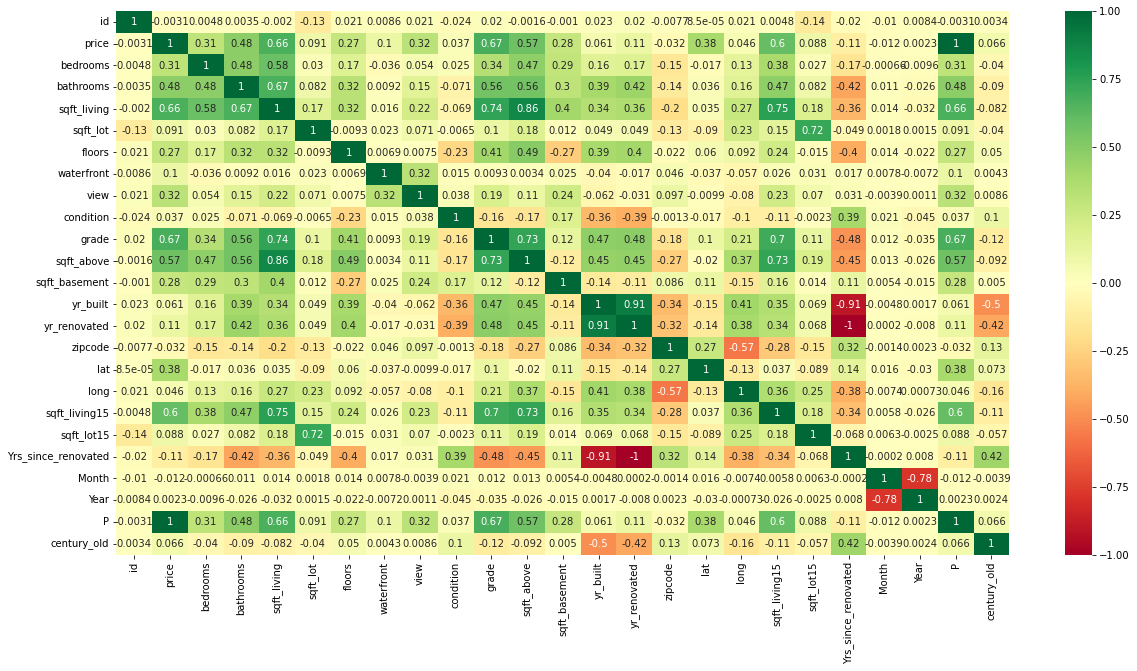

In [50]:
#controllo la correlazione che è presente fra la variabile prezzo e tutte le altre variabili
#all'interno della matrice di correlazione oltre a notare molte variabili correlate con il prezzo si notano molte variabili correlate fra di loro causando il problema della multicollinearità il quale se non sistemato andrà a ostacolare la predizione finale
plt.figure(figsize=(20,10))
sns.heatmap(house2.corr(), annot=True, vmin=-1, vmax=+1, cmap='RdYlGn')

In [51]:
#controllo le correlazioni maggiori di 0.8 e le elimino
remove_collinear_features(house2, 0.8)

sqft_above | sqft_living | 0.86
yr_renovated | yr_built | 0.91
Yrs_since_renovated | yr_built | 0.91
Yrs_since_renovated | yr_renovated | 1.0
P | price | 1.0


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Year,century_old
0,7129300520,221900.0,3,1.0,1180,5650,1.0,0,0,3,...,0,1955,98178,47.5112,-122.257,1340,5650,10,2014,0
1,6414100192,538000.0,3,2.0,2570,7242,2.0,0,0,3,...,400,1951,98125,47.7210,-122.319,1690,7639,12,2014,0
2,5631500400,180000.0,2,1.0,770,10000,1.0,0,0,3,...,0,1933,98028,47.7379,-122.233,2720,8062,2,2015,0
3,2487200875,604000.0,4,3.0,1960,5000,1.0,0,0,5,...,910,1965,98136,47.5208,-122.393,1360,5000,12,2014,0
4,1954400510,510000.0,3,2.0,1680,8080,1.0,0,0,3,...,0,1987,98074,47.6168,-122.045,1800,7503,2,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.0,1530,1131,3.0,0,0,3,...,0,2009,98103,47.6993,-122.346,1530,1509,5,2014,0
21609,6600060120,400000.0,4,2.0,2310,5813,2.0,0,0,3,...,0,2014,98146,47.5107,-122.362,1830,7200,2,2015,0
21610,1523300141,402101.0,2,1.0,1020,1350,2.0,0,0,3,...,0,2009,98144,47.5944,-122.299,1020,2007,6,2014,0
21611,291310100,400000.0,3,2.0,1600,2388,2.0,0,0,3,...,0,2004,98027,47.5345,-122.069,1410,1287,1,2015,0


In [52]:
house2 = house2.drop(columns = ['sqft_above', 'yr_built', 'Yrs_since_renovated', 'P'], axis=1)


In [53]:
df_characteristics(house2)

The shape of this dataframe is: (21207, 21) 

This dataframe has 21 numeric features. 

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'Month', 'Year', 'century_old'],
      dtype='object') 

This dataframe has 0 categorical features. 

Index([], dtype='object')


In [54]:
house2

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Year,century_old
0,7129300520,221900.0,3,1.0,1180,5650,1.0,0,0,3,...,0,1955,98178,47.5112,-122.257,1340,5650,10,2014,0
1,6414100192,538000.0,3,2.0,2570,7242,2.0,0,0,3,...,400,1991,98125,47.7210,-122.319,1690,7639,12,2014,0
2,5631500400,180000.0,2,1.0,770,10000,1.0,0,0,3,...,0,1933,98028,47.7379,-122.233,2720,8062,2,2015,0
3,2487200875,604000.0,4,3.0,1960,5000,1.0,0,0,5,...,910,1965,98136,47.5208,-122.393,1360,5000,12,2014,0
4,1954400510,510000.0,3,2.0,1680,8080,1.0,0,0,3,...,0,1987,98074,47.6168,-122.045,1800,7503,2,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.0,1530,1131,3.0,0,0,3,...,0,2009,98103,47.6993,-122.346,1530,1509,5,2014,0
21609,6600060120,400000.0,4,2.0,2310,5813,2.0,0,0,3,...,0,2014,98146,47.5107,-122.362,1830,7200,2,2015,0
21610,1523300141,402101.0,2,1.0,1020,1350,2.0,0,0,3,...,0,2009,98144,47.5944,-122.299,1020,2007,6,2014,0
21611,291310100,400000.0,3,2.0,1600,2388,2.0,0,0,3,...,0,2004,98027,47.5345,-122.069,1410,1287,1,2015,0


In [55]:
#creo un dataframe in cui controllo le variabili che avevano la maggiore asimmetria positiva e di volta in volta controllo se è migliorato qualcosa
dataset_log = pd.DataFrame(columns=['Feature', 'Skew', 'Kurtosis'])
columns = ['lat', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view','grade','sqft_basement','sqft_living15','sqft_lot15']
for col in columns:
    dataset_log.loc[dataset_log.shape[0]] = [col, house2[col].skew(), house2[col].kurtosis()]
dataset_log

,Feature,Skew,Kurtosis
0,lat,-0.465840,-0.712308
1,bedrooms,2.031795,51.938767
2,bathrooms,0.917062,2.009239
3,sqft_living,1.000265,1.577884
4,sqft_lot,13.187481,298.218324
5,waterfront,15.084675,225.568689
6,view,3.600168,12.509658
7,grade,0.628667,0.914283
8,sqft_basement,1.455190,1.523093
9,sqft_living15,1.035913,1.323737


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Asimmetria lat: -0.4658404343107719
Curtosi lat: -0.712308168404943
Asimmetria bed: 2.0317949387494467
Curtosi bed: 51.93876697604471
Asimmetria bathrooms: 0.9170622257478809
Curtosi bathrooms: 2.0092388985906884


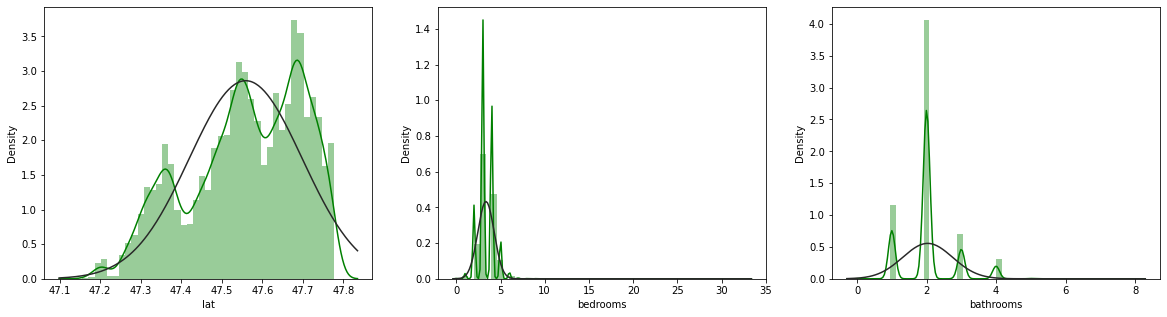

In [56]:
#applico la trasformazione logaritmica a quelle variabili con code di outlier positive
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)
sns.distplot(house2['lat'], color="g", fit=norm, ax=ax[0])
sns.distplot(house2['bedrooms'], color="g", fit=norm, ax=ax[1])
sns.distplot(house2['bathrooms'], color="g", fit=norm, ax=ax[2])

print("Asimmetria lat:",house2['lat'].skew())
print("Curtosi lat:",house2['lat'].kurtosis())

print("Asimmetria bed:",house2['bedrooms'].skew())
print("Curtosi bed:",house2['bedrooms'].kurtosis())

print("Asimmetria bathrooms:",house2['bathrooms'].skew())
print("Curtosi bathrooms:",house2['bathrooms'].kurtosis())



In [57]:
dataset_log.loc[dataset_log['Skew'] > 1]

,Feature,Skew,Kurtosis
1,bedrooms,2.031795,51.938767
3,sqft_living,1.000265,1.577884
4,sqft_lot,13.187481,298.218324
5,waterfront,15.084675,225.568689
6,view,3.600168,12.509658
8,sqft_basement,1.455190,1.523093
9,sqft_living15,1.035913,1.323737
10,sqft_lot15,9.563832,153.081131


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Asimmetria: 1.000265184331813
Curtosi: 1.5778839974158854
Asimmetria: 13.187480891943975
Curtosi: 298.2183244896106
Asimmetria: 15.084674859894587
Curtosi: 225.56868866078662


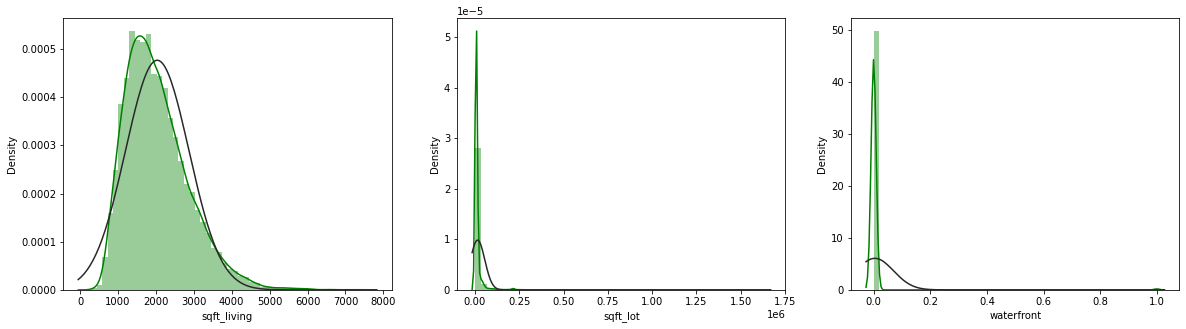

In [58]:
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)
sns.distplot(house2['sqft_living'], color="g", fit=norm, ax=ax[0])
sns.distplot(house2['sqft_lot'], color="g", fit=norm, ax=ax[1])
sns.distplot(house2['waterfront'], color="g", fit=norm, ax=ax[2])

print("Asimmetria:",house2['sqft_living'].skew())
print("Curtosi:",house2['sqft_living'].kurtosis())

print("Asimmetria:",house2['sqft_lot'].skew())
print("Curtosi:",house2['sqft_lot'].kurtosis())

print("Asimmetria:",house2['waterfront'].skew())
print("Curtosi:",house2['waterfront'].kurtosis())

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Asimmetria: 3.6001680027934406
Curtosi: 12.509657806924691
Asimmetria: 0.6286666323899702
Curtosi: 0.9142834295551241
Asimmetria: 1.4551896035423375
Curtosi: 1.5230931681779771


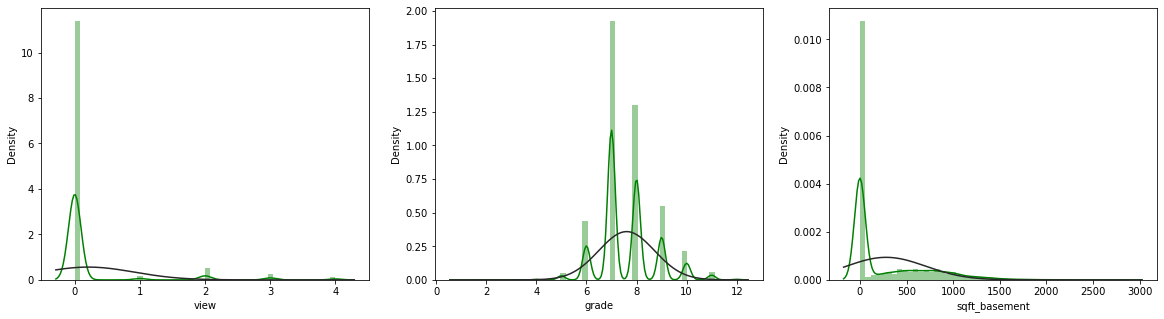

In [59]:
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)
sns.distplot(house2['view'], color="g", fit=norm, ax=ax[0])
sns.distplot(house2['grade'], color="g", fit=norm, ax=ax[1])
sns.distplot(house2['sqft_basement'], color="g", fit=norm, ax=ax[2])

print("Asimmetria:",house2['view'].skew())
print("Curtosi:",house2['view'].kurtosis())

print("Asimmetria:",house2['grade'].skew())
print("Curtosi:",house2['grade'].kurtosis())

print("Asimmetria:",house2['sqft_basement'].skew())
print("Curtosi:",house2['sqft_basement'].kurtosis())


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Asimmetria: 1.035912831669052
Curtosi: 1.3237374189246025
Asimmetria: 9.563832404669956
Curtosi: 153.08113128304242


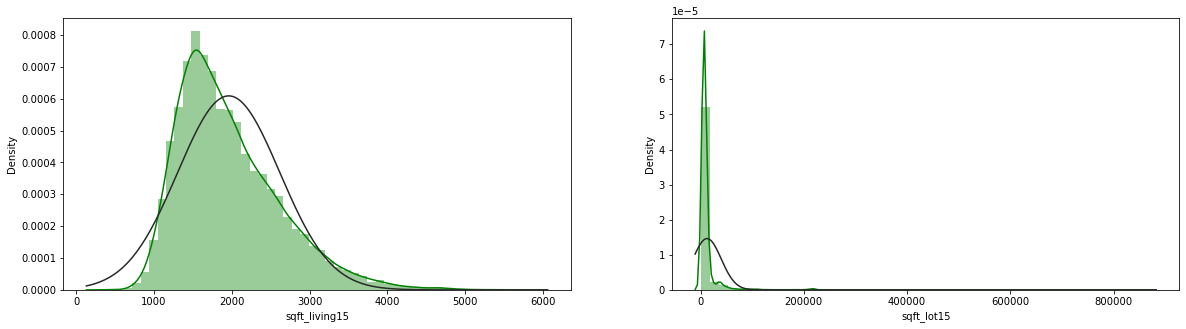

In [60]:
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(20)

sns.distplot(house2['sqft_living15'], color="g", fit=norm, ax=ax[0])
sns.distplot(house2['sqft_lot15'], color="g", fit=norm, ax=ax[1])


print("Asimmetria:",house2['sqft_living15'].skew())
print("Curtosi:",house2['sqft_living15'].kurtosis())

print("Asimmetria:",house2['sqft_lot15'].skew())
print("Curtosi:",house2['sqft_lot15'].kurtosis())



/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Asimmetria: -0.4658404343107719
Curtosi: -0.712308168404943
Asimmetria: 2.0317949387494467
Curtosi: 51.93876697604471
Asimmetria: 0.9170622257478809
Curtosi: 2.0092388985906884


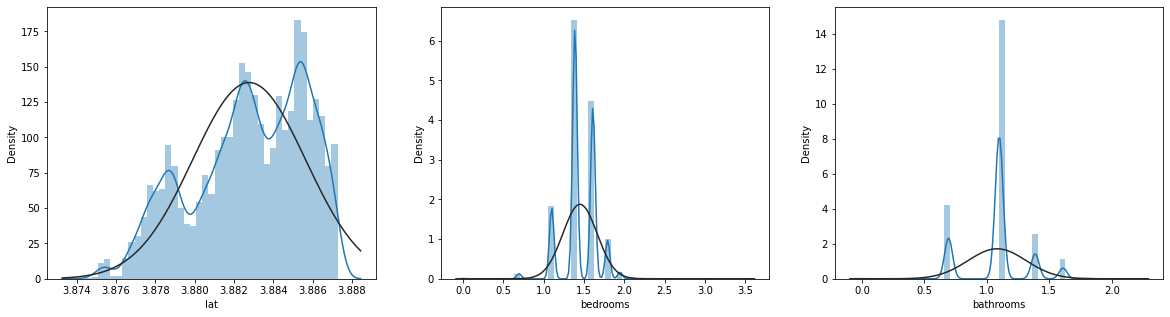

In [61]:
#per l'asimmetria 'skewness' da -0.5 a 0.5: curva abbastanza simmetrica. Da -1 a -0.5 o +0.5 a +1.0 moderata asimmetria. Oltre questo range: altamente asimmetrica
#per la curtosi invece Se > 3: alta curtosi, code lunghe, molti valori estremi possibilmente anomali. Se = 3: distribuzione normale. Se < 3: code corte, pochi valori estremi
#la maggior parte delle variabili presenta forte asimmetria e una curtosi molto alta per cui provo ad applicare la trasformazione logaritmica alle variabili per vedere se migliorano
#applico la trasformazione logaritmica
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)
sns.distplot(np.log1p(house2['lat']), fit=norm, ax=ax[0])
sns.distplot(np.log1p(house2['bedrooms']), fit=norm, ax=ax[1])
sns.distplot(np.log1p(house2['bathrooms']), fit=norm, ax=ax[2])

print("Asimmetria:",house2['lat'].skew())
print("Curtosi:",house2['lat'].kurtosis())

print("Asimmetria:",house2['bedrooms'].skew())
print("Curtosi:",house2['bedrooms'].kurtosis())

print("Asimmetria:",house2['bathrooms'].skew())
print("Curtosi:",house2['bathrooms'].kurtosis())


In [62]:
dataset_log.loc[dataset_log['Skew'] > 1]

,Feature,Skew,Kurtosis
1,bedrooms,2.031795,51.938767
3,sqft_living,1.000265,1.577884
4,sqft_lot,13.187481,298.218324
5,waterfront,15.084675,225.568689
6,view,3.600168,12.509658
8,sqft_basement,1.455190,1.523093
9,sqft_living15,1.035913,1.323737
10,sqft_lot15,9.563832,153.081131


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Asimmetria: 1.000265184331813
Curtosi: 1.5778839974158854
Asimmetria: 13.187480891943975
Curtosi: 298.2183244896106
Asimmetria: 15.084674859894587
Curtosi: 225.56868866078662


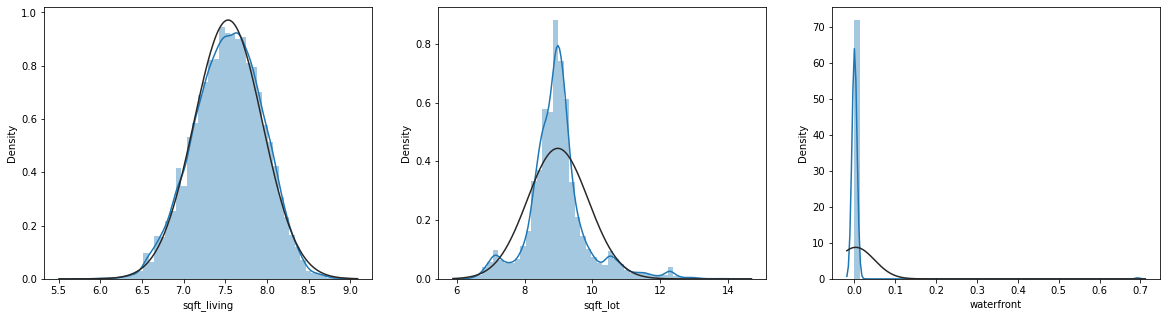

In [63]:
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)
sns.distplot(np.log1p(house2['sqft_living']), fit=norm, ax=ax[0])
sns.distplot(np.log1p(house2['sqft_lot']), fit=norm, ax=ax[1])
sns.distplot(np.log1p(house2['waterfront']), fit=norm, ax=ax[2])

print("Asimmetria:",house2['sqft_living'].skew())
print("Curtosi:",house2['sqft_living'].kurtosis())

print("Asimmetria:",house2['sqft_lot'].skew())
print("Curtosi:",house2['sqft_lot'].kurtosis())

print("Asimmetria:",house2['waterfront'].skew())
print("Curtosi:",house2['waterfront'].kurtosis())

In [64]:
dataset_log.loc[dataset_log['Skew'] > 1]

,Feature,Skew,Kurtosis
1,bedrooms,2.031795,51.938767
3,sqft_living,1.000265,1.577884
4,sqft_lot,13.187481,298.218324
5,waterfront,15.084675,225.568689
6,view,3.600168,12.509658
8,sqft_basement,1.455190,1.523093
9,sqft_living15,1.035913,1.323737
10,sqft_lot15,9.563832,153.081131


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Asimmetria: 3.6001680027934406
Curtosi: 12.509657806924691
Asimmetria: 0.6286666323899702
Curtosi: 0.9142834295551241
Asimmetria: 1.4551896035423375
Curtosi: 1.5230931681779771


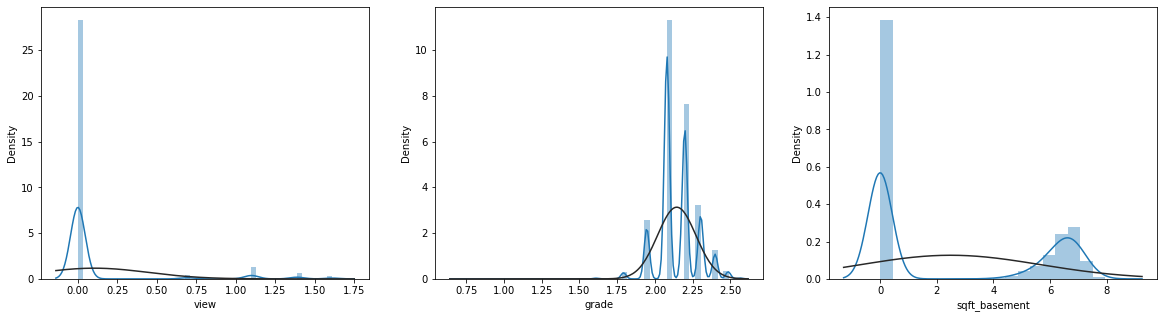

In [65]:
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)
sns.distplot(np.log1p(house2['view']), fit=norm, ax=ax[0])
sns.distplot(np.log1p(house2['grade']), fit=norm, ax=ax[1])
sns.distplot(np.log1p(house2['sqft_basement']), fit=norm, ax=ax[2])

print("Asimmetria:",house2['view'].skew())
print("Curtosi:",house2['view'].kurtosis())

print("Asimmetria:",house2['grade'].skew())
print("Curtosi:",house2['grade'].kurtosis())

print("Asimmetria:",house2['sqft_basement'].skew())
print("Curtosi:",house2['sqft_basement'].kurtosis())

In [66]:
dataset_log.loc[dataset_log['Skew'] > 1]

,Feature,Skew,Kurtosis
1,bedrooms,2.031795,51.938767
3,sqft_living,1.000265,1.577884
4,sqft_lot,13.187481,298.218324
5,waterfront,15.084675,225.568689
6,view,3.600168,12.509658
8,sqft_basement,1.455190,1.523093
9,sqft_living15,1.035913,1.323737
10,sqft_lot15,9.563832,153.081131


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Asimmetria: 1.035912831669052
Curtosi: 1.3237374189246025
Asimmetria: 9.563832404669956
Curtosi: 153.08113128304242


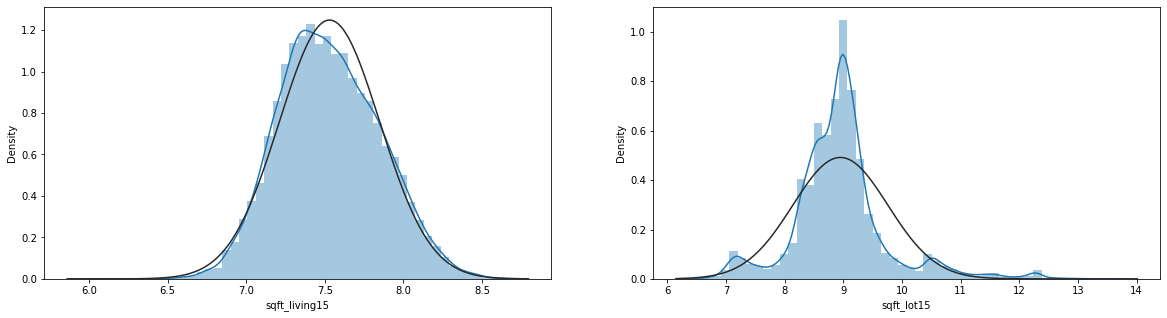

In [67]:
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(20)

sns.distplot(np.log1p(house2['sqft_living15']), fit=norm, ax=ax[0])
sns.distplot(np.log1p(house2['sqft_lot15']), fit=norm, ax=ax[1])


print("Asimmetria:",house2['sqft_living15'].skew())
print("Curtosi:",house2['sqft_living15'].kurtosis())

print("Asimmetria:",house2['sqft_lot15'].skew())
print("Curtosi:",house2['sqft_lot15'].kurtosis())

In [68]:
dataset_log.loc[dataset_log['Skew'] > 1]

,Feature,Skew,Kurtosis
1,bedrooms,2.031795,51.938767
3,sqft_living,1.000265,1.577884
4,sqft_lot,13.187481,298.218324
5,waterfront,15.084675,225.568689
6,view,3.600168,12.509658
8,sqft_basement,1.455190,1.523093
9,sqft_living15,1.035913,1.323737
10,sqft_lot15,9.563832,153.081131


In [69]:
#controllo nuovamente gli outlier per controllare se le features sono più normalizzate dopo la trasformazione logaritmica
def calc_interquartile(house2, column):
    global lower, upper
    #calcolo il primo e il terzo quartile
    first_quartile, third_quartile = np.percentile(house2[column], 25), np.percentile(house2[column], 75)
    #calcolo il range interquantile
    iqr = third_quartile - first_quartile
    #outlier cutoff e uso il valore generico del calcolo degli outlier 1.5
    cutoff = iqr*1.5
    #calcolo il limite inferiore e superiore
    lower, upper = first_quartile - cutoff , third_quartile + cutoff
    #rimuovo gli outlier dalle colonne
    upper_outliers = house2[house2[column] > upper]
    lower_outliers = house2[house2[column] < lower]
    print('Lower outliers', lower_outliers.shape[0])
    print('Upper outliers', upper_outliers.shape[0])
    return print('total outliers', upper_outliers.shape[0] + lower_outliers.shape[0])






In [70]:
for i in house2.columns:
    print('Total outliers in ', i)
    calc_interquartile(house2, i)
    print()

Total outliers in  id
Lower outliers 0
Upper outliers 0
total outliers 0

Total outliers in  price
Lower outliers 0
Upper outliers 829
total outliers 829

Total outliers in  bedrooms
Lower outliers 212
Upper outliers 304
total outliers 516

Total outliers in  bathrooms
Lower outliers 3947
Upper outliers 3480
total outliers 7427

Total outliers in  sqft_living
Lower outliers 0
Upper outliers 416
total outliers 416

Total outliers in  sqft_lot
Lower outliers 0
Upper outliers 2339
total outliers 2339

Total outliers in  floors
Lower outliers 0
Upper outliers 7
total outliers 7

Total outliers in  waterfront
Lower outliers 0
Upper outliers 92
total outliers 92

Total outliers in  view
Lower outliers 0
Upper outliers 1889
total outliers 1889

Total outliers in  condition
Lower outliers 30
Upper outliers 0
total outliers 30

Total outliers in  grade
Lower outliers 275
Upper outliers 1313
total outliers 1588

Total outliers in  sqft_basement
Lower outliers 0
Upper outliers 509
total outliers 

In [71]:
def z_score(house2, column):
    #creo delle variabili globali per plottare il grafico 
    global zscore, outlier
     
    zscore = []
    outlier =[]
    
    threshold = 3
    
    mean = np.mean(house2[column])
    
    std = np.std(house2[column])
    for i in house2[column]:
        z = (i-mean)/std
        zscore.append(z)
        
        if np.abs(z) > threshold:
            outlier.append(i)
    return print('total outliers', len(outlier))

total outliers 418
0.0 0.0


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


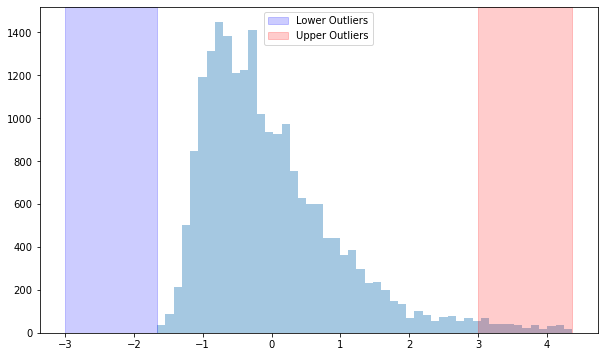

In [72]:
z_score(house2, 'price')
plt.figure(figsize = (10,6))
sns.distplot(zscore, kde=False)
print(upper, lower)
plt.axvspan(xmin = -3 ,xmax= min(zscore),alpha=0.2, color='blue', label='Lower Outliers')
plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red', label='Upper Outliers')
plt.legend()
plt.show()

In [73]:
# si nota che dopo la trasformazione logaritmica gli outlier sono peggiorati e i miglioramenti sono piccolissimi per cui lasciamo il dataset senza le trasformazioni logaritmiche
#infatti ogni volta che applicavo trasformazioni logaritmiche e calcolavo l'asimmetria e la curtosi nessuna variabile migliorava presentando anche dopo la trasformazione valori maggiori di 1

In [74]:
house2

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Year,century_old
0,7129300520,221900.0,3,1.0,1180,5650,1.0,0,0,3,...,0,1955,98178,47.5112,-122.257,1340,5650,10,2014,0
1,6414100192,538000.0,3,2.0,2570,7242,2.0,0,0,3,...,400,1991,98125,47.7210,-122.319,1690,7639,12,2014,0
2,5631500400,180000.0,2,1.0,770,10000,1.0,0,0,3,...,0,1933,98028,47.7379,-122.233,2720,8062,2,2015,0
3,2487200875,604000.0,4,3.0,1960,5000,1.0,0,0,5,...,910,1965,98136,47.5208,-122.393,1360,5000,12,2014,0
4,1954400510,510000.0,3,2.0,1680,8080,1.0,0,0,3,...,0,1987,98074,47.6168,-122.045,1800,7503,2,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.0,1530,1131,3.0,0,0,3,...,0,2009,98103,47.6993,-122.346,1530,1509,5,2014,0
21609,6600060120,400000.0,4,2.0,2310,5813,2.0,0,0,3,...,0,2014,98146,47.5107,-122.362,1830,7200,2,2015,0
21610,1523300141,402101.0,2,1.0,1020,1350,2.0,0,0,3,...,0,2009,98144,47.5944,-122.299,1020,2007,6,2014,0
21611,291310100,400000.0,3,2.0,1600,2388,2.0,0,0,3,...,0,2004,98027,47.5345,-122.069,1410,1287,1,2015,0


In [76]:
#deep neural model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from sklearn.metrics import mean_absolute_error, r2_score, explained_variance_score


X = house2.drop(columns=['price'])
y = house2['price']
y = np.power(np.exp(1), y)

# Splitting the dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y)

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
scaler = MinMaxScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = keras.Sequential()

n_units = X.shape[1]
n_layers = 8

for _ in range(n_layers):
    model.add(keras.layers.Dense(units=n_units, activation='relu'))

model.add(keras.layers.Dense(units=1))

model.compile(optimizer='adam', loss='mse')

In [ ]:
hist = model.fit(
    x=X_train, 
    y=y_train,    
    verbose=False,
    validation_data=(X_test, y_test),
    batch_size=128,
    epochs=500
)

In [ ]:
y_train_pred = model.predict(x=X_train)
y_test_pred = model.predict(x=X_test)

In [ ]:
print(f'MAE train set: {mean_absolute_error(y_train_pred, y_train):.2}')
print(f'MAE test set: {mean_absolute_error(y_test_pred, y_test):.2}')

In [ ]:
loss_df = pd.DataFrame(hist.history)

In [ ]:
plt.figure(figsize=(15, 6))
x, y = range(1, len(loss_df['loss']) + 1), loss_df['loss']
start = 2
plt.plot(x[start:], y[start:], label='Training Loss')
x, y = range(1, len(loss_df['val_loss']) + 1), loss_df['val_loss']
plt.plot(x[start:], y[start:], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

In [ ]:
y_test_pred = model.predict(X_test)

comp_df = pd.DataFrame(
    data={
        'Test True Y': y_test,
        'Test Pred Y': y_test_pred.reshape((-1,))
    }
)

comp_df.describe().T

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
plt.scatter(
    x=y_train, 
    y=y_train_pred, 
    alpha=0.3, 
    edgecolor=None
)
plt.plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
    color='black', 
    linestyle='dashed', 
    label=f'Desired\nR² train set: {r2_score(y_train, y_train_pred):.2}'
)
plt.legend()
plt.xlabel('True value')
plt.ylabel('Predicted value')


plt.subplot(1,2,2)
plt.scatter(
    x=y_test, 
    y=y_test_pred, 
    alpha=0.3, 
    edgecolor=None
)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='black', 
    linestyle='dashed', 
    label=f'Desired\nR² test set: {r2_score(y_test, y_test_pred):.2}'
)
plt.legend()
plt.xlabel('True value')
plt.ylabel('Predicted value')

In [ ]:
def feature_importance(model, metric, X, y, features_name, shuffles_per_column=10):
    
    n_rows, n_cols = X.shape
    ref_score = metric(y, model.predict(X)) # Reference score    
    mean_list, std_list = [], []
    X_cp = X.copy()
    
    for c in range(n_cols):
        metric_list = []
        for _ in range(shuffles_per_column):
            np.random.shuffle(X_cp[:, c])
            y_pred = model.predict(X_cp)
            score = metric(y, y_pred)
            metric_list.append(ref_score - score)
            X_cp[:, c] = X[:, c]        
        mean_list.append(np.mean(metric_list))
        std_list.append(np.std(metric_list))
    
    importance_rel = [np.round(100*np.mean(mean)/np.sum(mean_list), 2) for mean in mean_list]
            
    return pd.DataFrame({
        'Feature': features_name,
        'Importance (%)': importance_rel,
        'Mean': mean_list,
        'Std': std_list
    }).sort_values('Importance (%)', ascending=False).reset_index(drop=True)

ans = feature_importance(model, r2_score, X_test, y_test, X.columns)

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Importance (%)', y='Feature', data=ans)

In [ ]:
#applico una feature importance per vedere quali sono le variabili più importanti alla fine della previsione senza un'attenta valutazioen dei modelli ma solo vedendo quali sono più legate al prezzo al fime di predirlo
def feature_importance(model, metric, X, y, features_name, shuffles_per_column=10):
    
    n_rows, n_cols = X.shape
    ref_score = metric(y, model.predict(X)) # Reference score    
    mean_list, std_list = [], []
    X_cp = X.copy()
    
    for c in range(n_cols):
        metric_list = []
        for _ in range(shuffles_per_column):
            np.random.shuffle(X_cp[:, c])
            y_pred = model.predict(X_cp)
            score = metric(y, y_pred)
            metric_list.append(ref_score - score)
            X_cp[:, c] = X[:, c]        
        mean_list.append(np.mean(metric_list))
        std_list.append(np.std(metric_list))
    
    importance_rel = [np.round(100*np.mean(mean)/np.sum(mean_list), 2) for mean in mean_list]
            
    return pd.DataFrame({
        'Feature': features_name,
        'Importance (%)': importance_rel,
        'Mean': mean_list,
        'Std': std_list
    }).sort_values('Importance (%)', ascending=False).reset_index(drop=True)

ans = feature_importance(model, r2_score, X_test, y_test, X.columns)